In [1]:
# importing essential libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True) # droping Unnamed column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [6]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Here there is no missing values

In [7]:
# feature Engineering to use month and day column

df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Here I got two columns

Text(0.5, 1.0, 'Average Price')

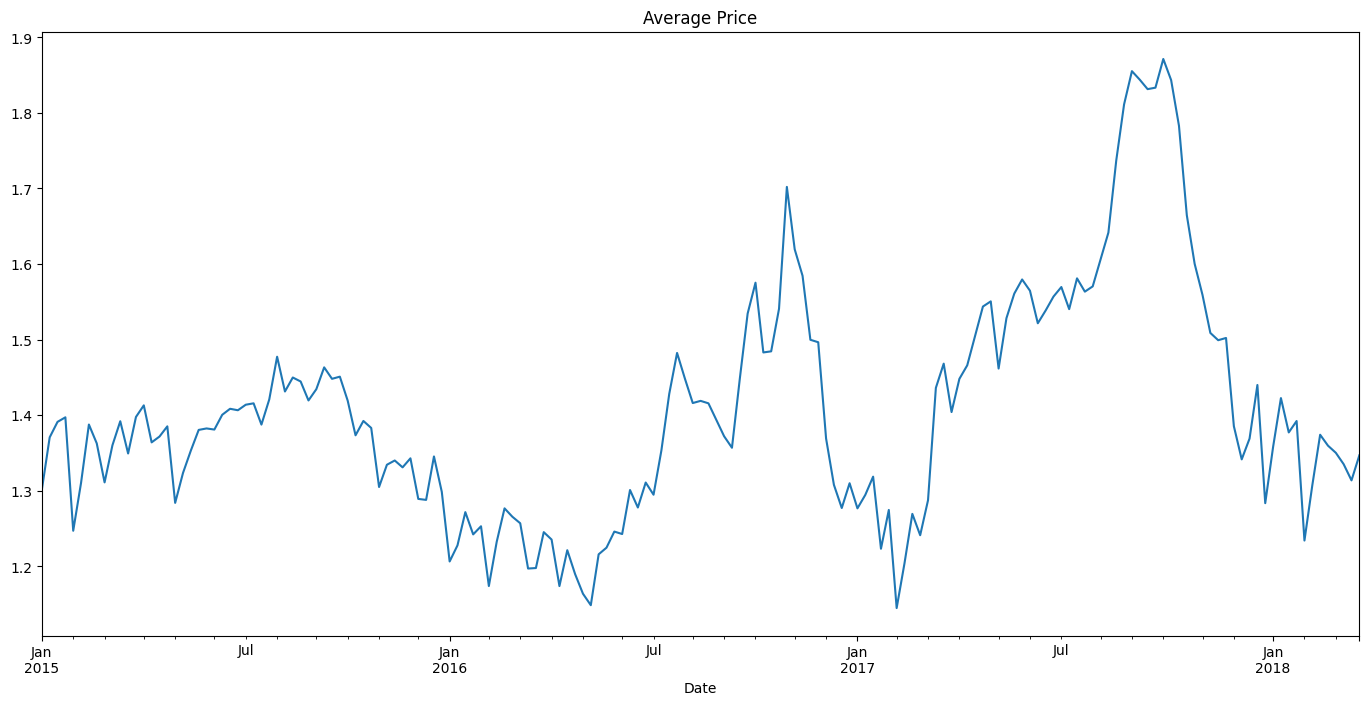

In [8]:
# ploting average prices
byDate=df.groupby('Date').mean()
plt.figure(figsize=(17,8),dpi=100)
byDate['AveragePrice'].plot()
plt.title('Average Price')

Text(0.5, 1.0, 'Average Price Per Month')

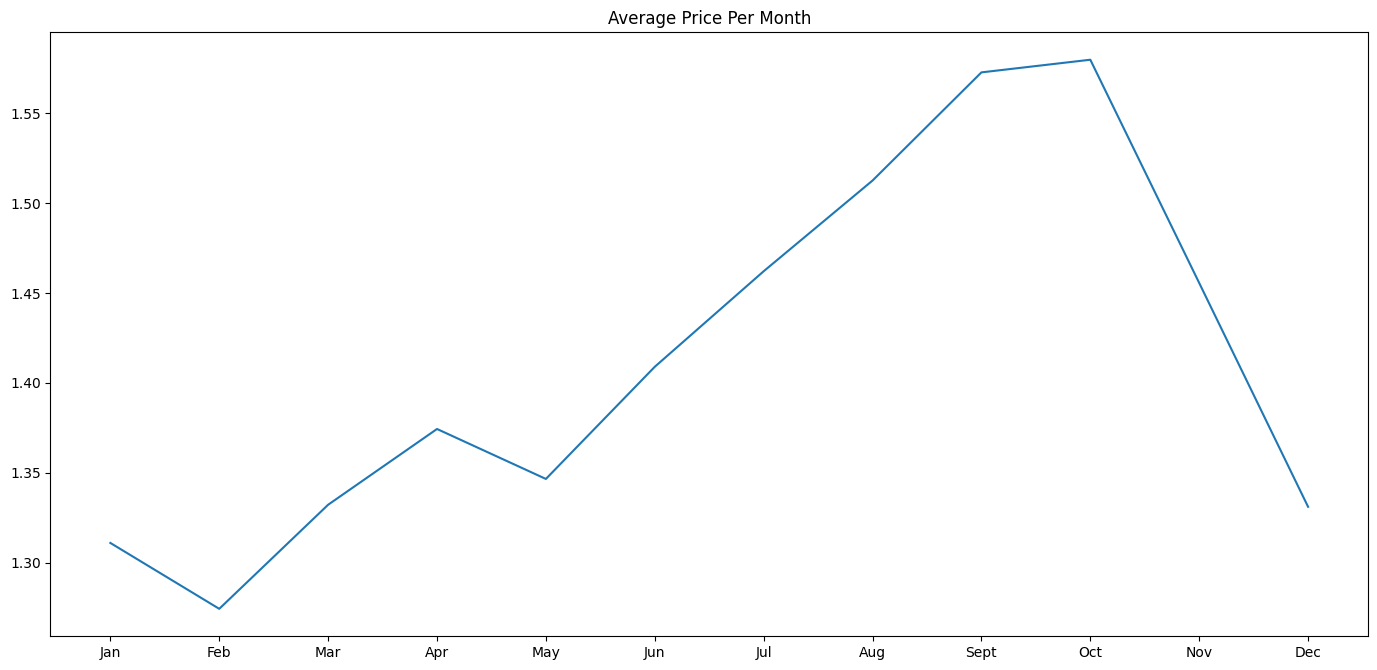

In [9]:
byMonth = df.groupby("Month").mean()
plt.figure(figsize=(17,8),dpi=100)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],byMonth['AveragePrice'])
plt.title('Average Price Per Month')

Text(0.5, 1.0, 'Average Price Per Day')

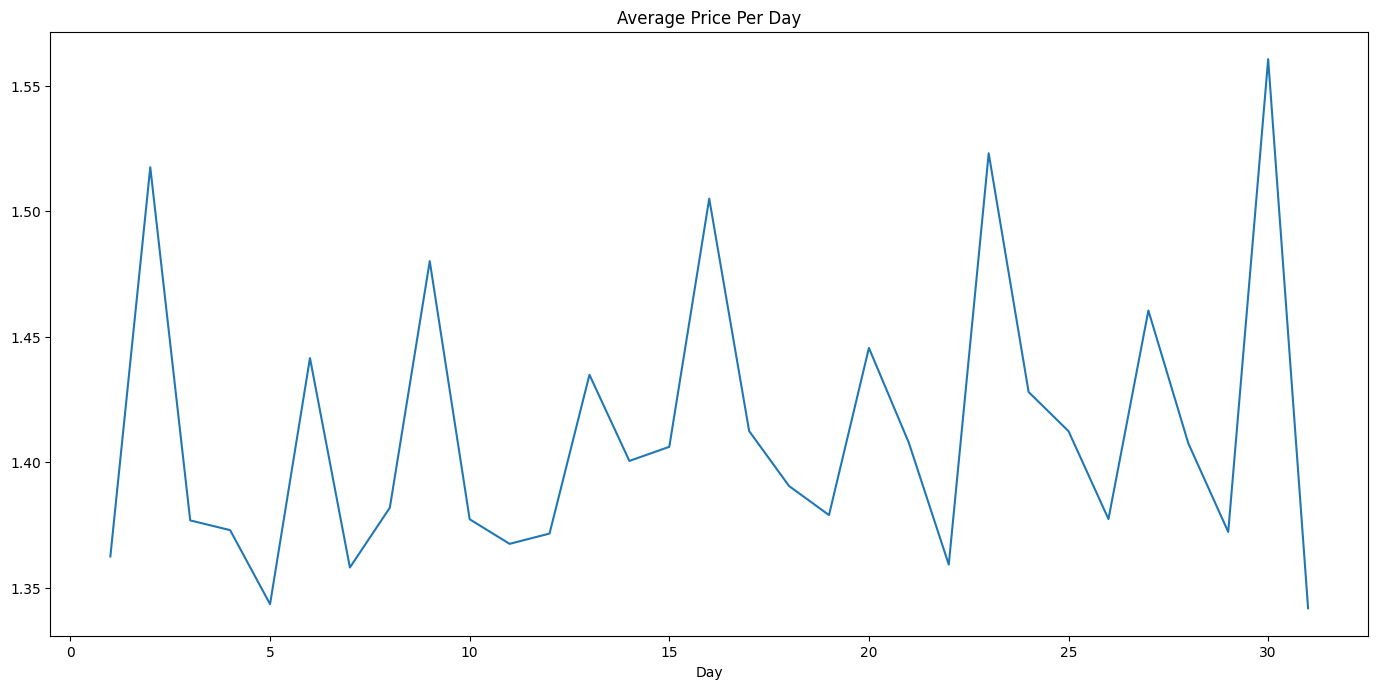

In [10]:
byDay = df.groupby("Day").mean()
plt.figure(figsize=(17,8),dpi=100)
byDay['AveragePrice'].plot()
plt.title('Average Price Per Day')

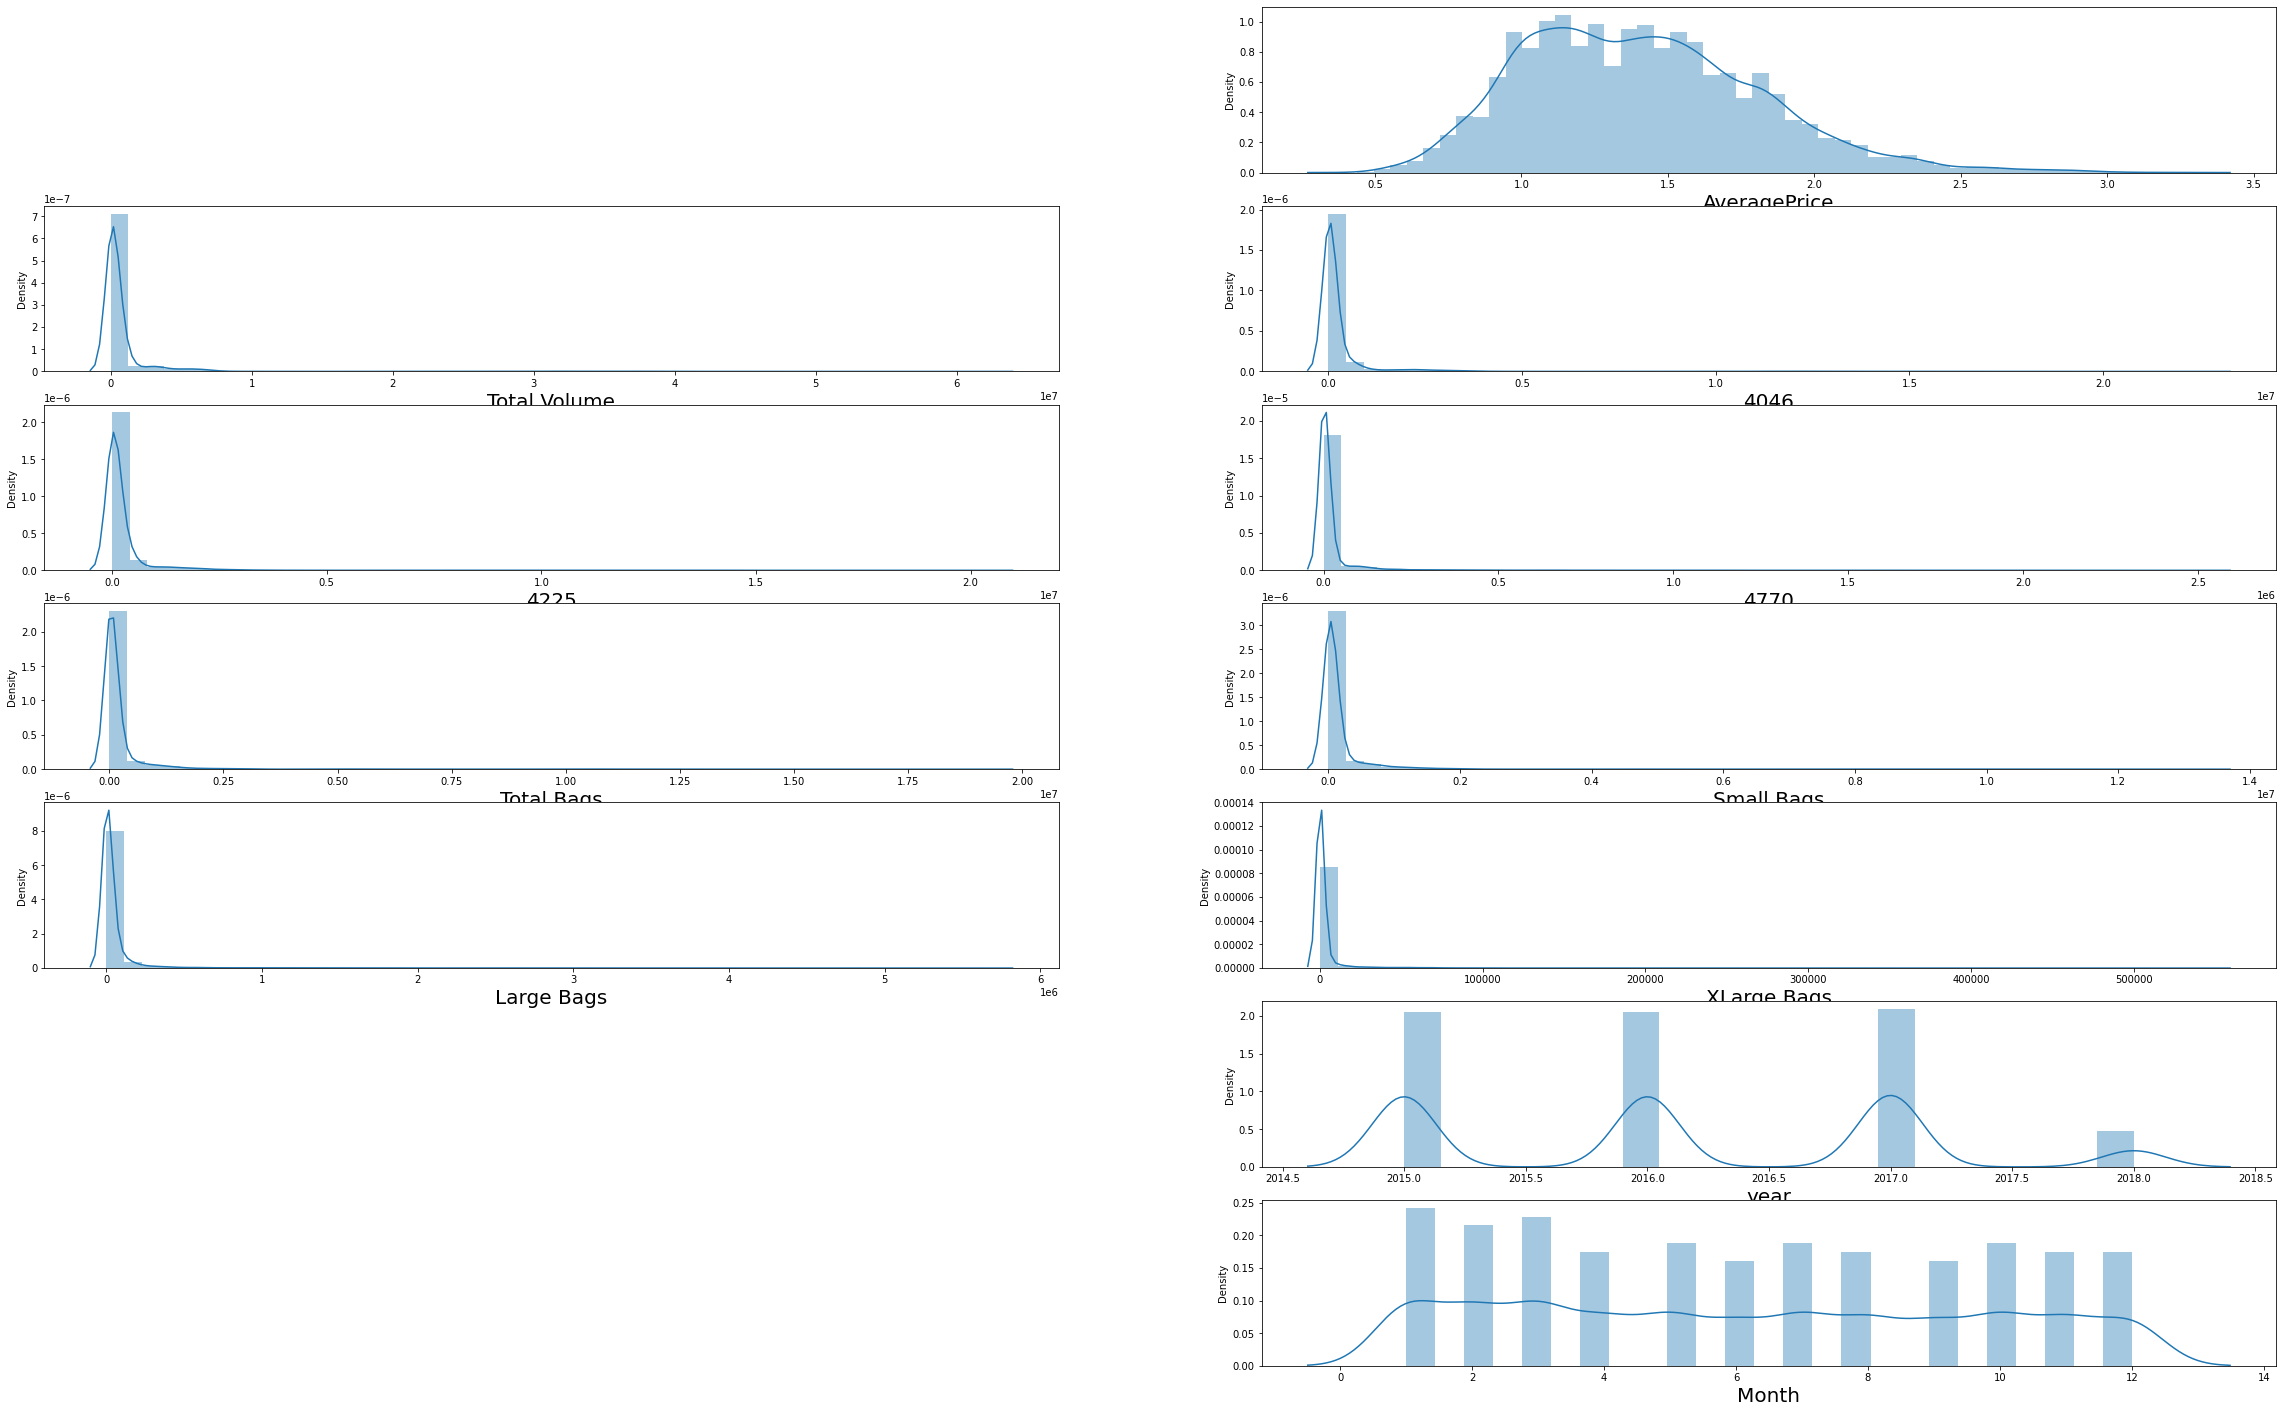

In [11]:
#plotting distribution plot for my dataframe to check and remove outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=14:
            ax = plt.subplot(7,2,plotnumber)
            sns.distplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

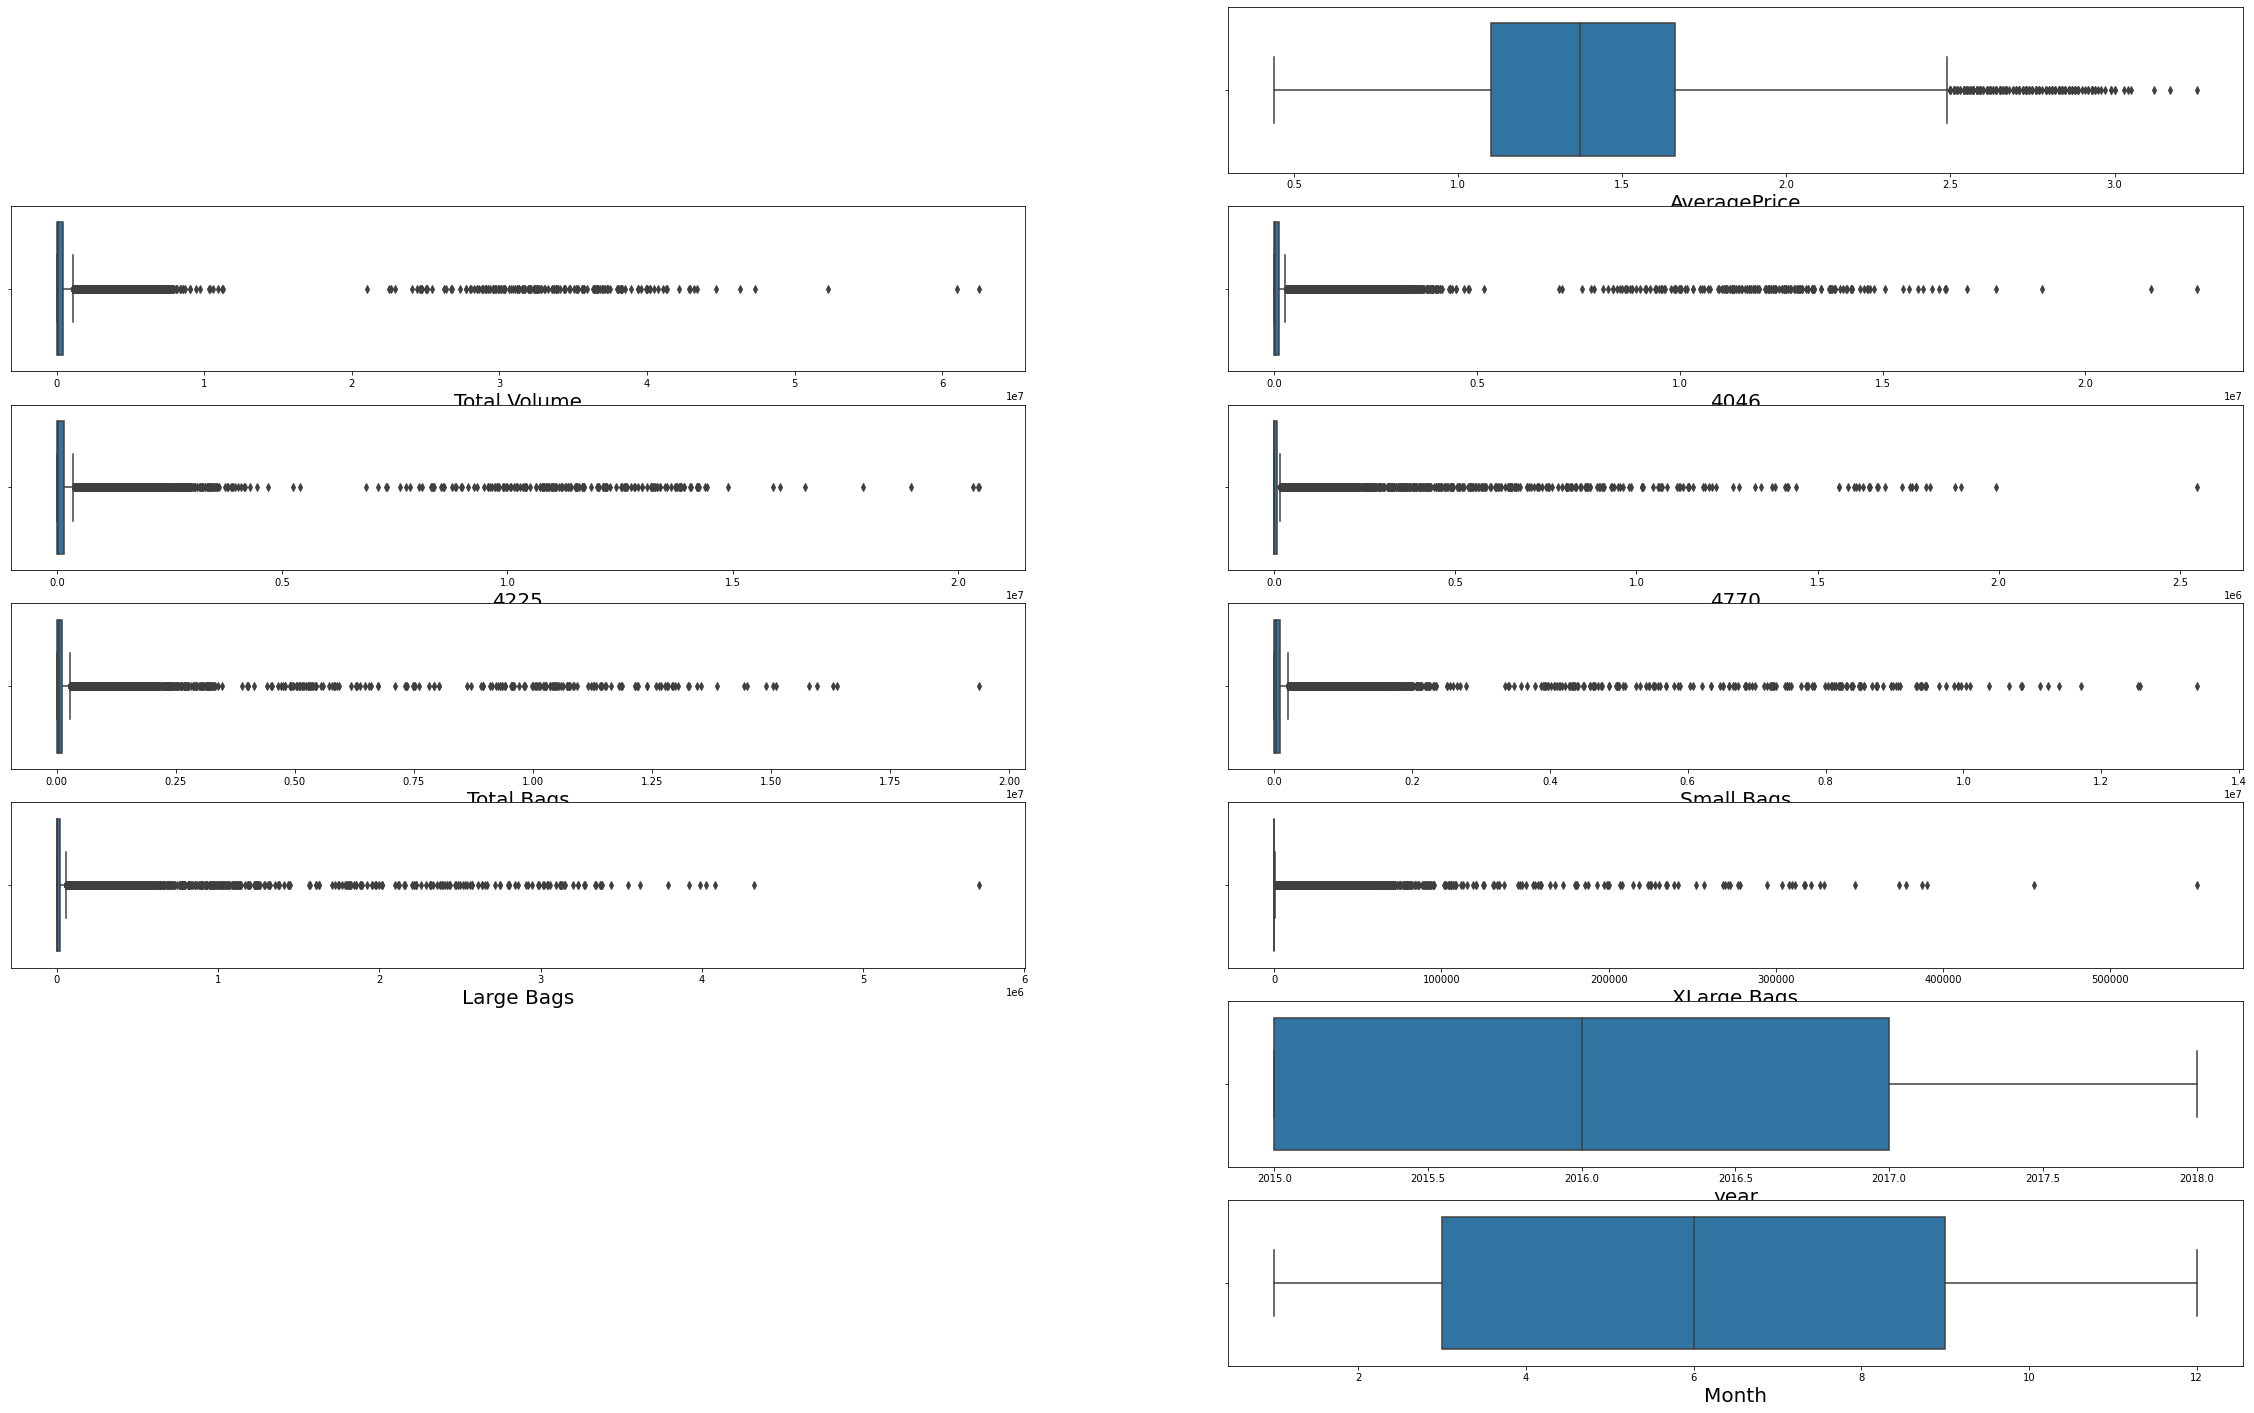

In [14]:
#plotting box plot for my dataframe to check and remove outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=14:
            ax = plt.subplot(7,2,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [16]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


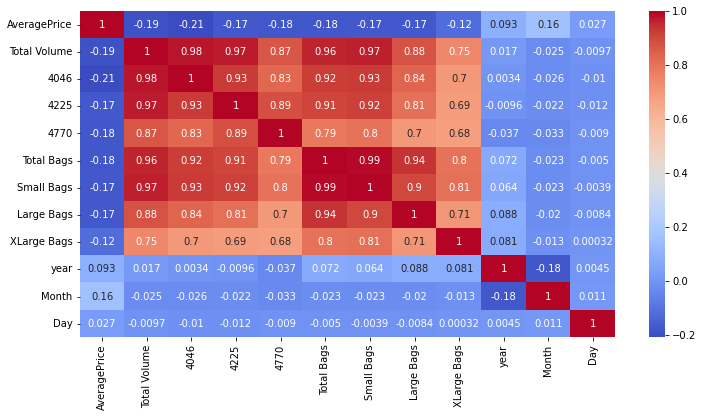

In [17]:
df_corr = df.corr(method='pearson')
plt.figure(figsize=(12,6))
sns.heatmap(df_corr,cmap='coolwarm',annot=True)

In [19]:
# checking Multicolinearity

df_vif = df.copy()
df_vif.drop(columns=['Date','type','region'],inplace = True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

Xf = add_constant(df_vif)
pd.Series([variance_inflation_factor(Xf.values, i) 
               for i in range(Xf.shape[1])], 
              index=Xf.columns)

const           5.068485e+06
AveragePrice    1.099766e+00
Total Volume    4.918067e+09
4046            6.598339e+08
4225            5.978631e+08
4770            4.762133e+06
Total Bags      2.370316e+14
Small Bags      1.364727e+14
Large Bags      1.448103e+13
XLarge Bags     7.622174e+10
year            1.101665e+00
Month           1.071816e+00
Day             1.001467e+00
dtype: float64

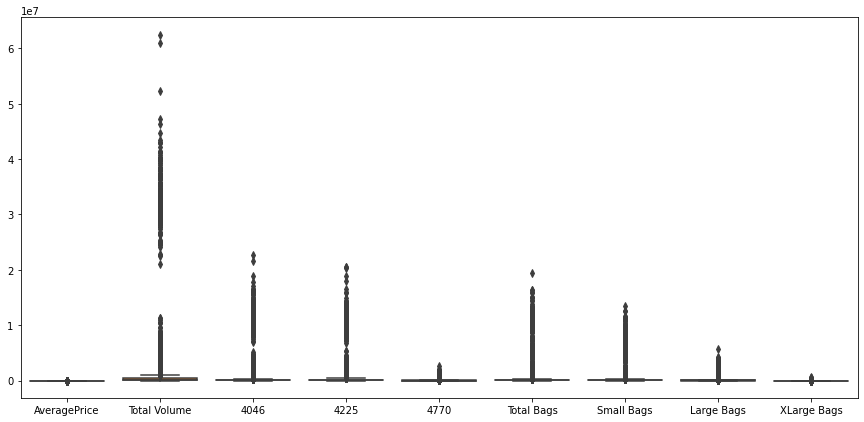

In [22]:
# workin on outliers

plt.figure(figsize=(15,7))
sns.boxplot(data = df[[
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])

In [23]:
# droping date column
df.drop(columns=["Date"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [27]:

from numpy import percentile

columns = df.columns
for j in columns:
    if isinstance(df[j][0], str) :
        continue
    else:
        for i in range(len(df)):
            #defining quartiles
            quartiles = percentile(df[j], [25,75])
            # calculate min/max
            lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
            upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
            if df[j][i] > upper_fence:
                df[j][i] = upper_fence
            elif df[j][i] < lower_fence:
                df[j][i] = lower_fence

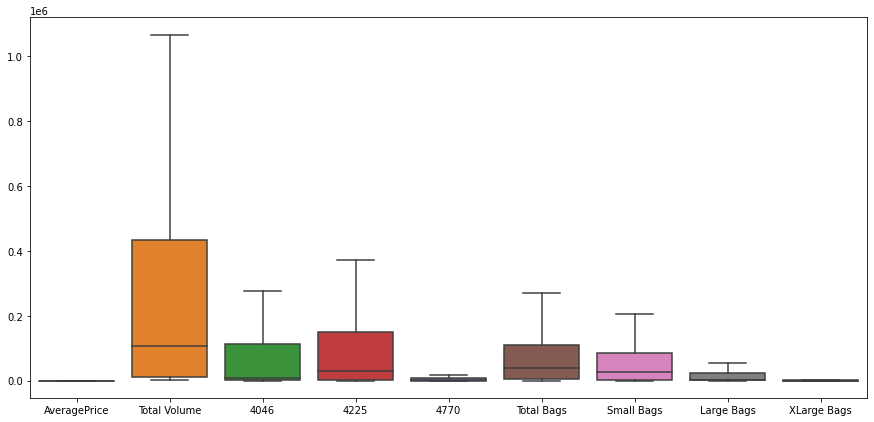

In [28]:
plt.figure(figsize=(15,7))
sns.boxplot(data = df[[
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])

In [29]:
# coverting categorical values to numerical

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['type'] = le.fit_transform(df['type'])
df['region'] = le.fit_transform(df['region'])

In [30]:
# splitting the data
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
# to scale my features.
scaler =StandardScaler()

x = scaler.fit_transform(x)

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=50)

In [34]:
# LINEAR REGRESSION
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_predi = lr.predict(x_test)

# printing metrics score
print("r2 score :",r2_score(y_test,lr_predi))
print("Mean Squared Error :",mean_squared_error(y_test,lr_predi))

r2 score : 0.4856185896739138
Mean Squared Error : 0.08019354857860332


In [35]:
# DECISION TREE REGRESSOR

from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
dtc.fit(x_train,y_train)
predi_dtc = dtc.predict(x_test)

# printing metrics score

print("Decision Tree R2 Score :",r2_score(y_test,predi_dtc))
print("Decision Tree mean squred error :",mean_squared_error(y_test,predi_dtc))

Decision Tree R2 Score : 0.7751338646705155
Decision Tree mean squred error : 0.035057280425037356


In [36]:
# K Neighbors Regressor

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(x_train,y_train)
predi_knn = knn.predict(x_test)
knn.score(x_train,y_train)

# printing metrics score

print("KNN R2 Score :",r2_score(y_test,predi_knn))
print("KNN mean squred error :",mean_squared_error(y_test,predi_knn))

KNN R2 Score : 0.5497822943131523
KNN mean squred error : 0.07019024157396646


In [37]:
# SUPPORT VECTOR REGRESSOR

from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(x_train,y_train)
predi_svr = svr.predict(x_test)

# printing metrics score

print("SVR R2 Score :",r2_score(y_test,predi_svr))
print("SVR mean squred error :",mean_squared_error(y_test,predi_svr))

SVR R2 Score : 0.4818184525652791
SVR mean squred error : 0.08078600093731794


In [38]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 150,random_state = 56)
rf.fit(x_train,y_train)
predi_rf = rf.predict(x_test)

# printing metrics score

print("rf R2 Score :",r2_score(y_test,predi_rf))
print("rf mean squred error :",mean_squared_error(y_test,predi_rf))

rf R2 Score : 0.8906056835309724
rf mean squred error : 0.017054890118250406


In [39]:
# Using Adaboost Regressor

from sklearn.ensemble import AdaBoostRegressor
ad = AdaBoostRegressor()
ad.fit(x_train,y_train)
predi_ad = ad.predict(x_test)

# printing metrics score

print("Adaboost R2 Score :",r2_score(y_test,predi_ad))
print("Adaboost mean squred error :",mean_squared_error(y_test,predi_ad))

Adaboost R2 Score : 0.5863936014050573
Adaboost mean squred error : 0.06448243298123443


**Random forest is giving Best metrics score hence saving the model**

In [40]:
import joblib

# saving the model
joblib.dump(rf,'rffile.obj')

['rffile.obj']

In [41]:
rf_from_joblib = joblib.load('rffile.obj') # loading the model